In [3]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
from collections import Counter

## 생로랑

In [5]:
mag_s = pd.read_csv('./magazine/final/magazine_s_stickword.csv', sep ='|', encoding = 'utf-8')

In [6]:
mag_s

,magazine,brand,title,link,date,word_laurent,ADFN,ADFN_2
0,A,YSL,"깊게 뿌리내리기 위하여, 수영",http://www.allurekorea.com/2020/11/20/%ea%b9%8...,2020-11-20,"['빨간 더블 브레스티드 코트, 타이츠, 라텍스 소재 보디슈트와 사이하이 부츠는 모...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '..."
1,A,YSL,코트 체크,http://www.allurekorea.com/2020/11/10/%ec%bd%9...,2020-10-26,"['클래식한 캐멀 컬러 코트는 1백78만원, 우영미(Wooyoungmi). 버건디 ...","['클래식', '컬러', '코트', '우영', 'WOOYOUNGMI', '버건디',...","['클래식', '컬러', '코트', '우영', 'WOOYOUNGMI', '버건디',..."
2,A,YSL,데님이여 영원하라,http://www.allurekorea.com/2020/11/06/%eb%8d%b...,2020-10-26,"[' 짙은 그레이 컬러의 데님 팬츠는 95만5천원, 생로랑 바이 안토니 바카렐로(...","['짙', '그레이', '컬러', '데님', '팬츠', 'LAURENT', 'ANT...","['짙', '그레이', '컬러', '데님', '팬츠', 'LAURENT', 'ANT..."
3,A,YSL,안경 하세요?!,http://www.allurekorea.com/2020/10/29/%ec%95%8...,2020-10-23,"[' YSL 모노그램을 새긴 블랙 에나멜 안경다리의 둥근 금테 안경은 40만원대,...","['YSL', '모노그램', '새기', '블랙', '에나멜', '안경', '다리',...","['YSL', '모노그램', '새기', '블랙', '에나멜', '안경', '다리',..."
4,A,YSL,"가을의 정석, 트렌치 코트 입는 법 8가지",http://www.allurekorea.com/2020/10/11/%ea%b0%8...,2020-09-27,"['컬러블록 트렌치코트는 가격미정, 르쥬(Leje). 컵케이크 프린트 티셔츠는 27...","['컬러', '블록', '트렌치', '코트', 'LEJE', '컵', '케이크', ...","['컬러', '블록', '트렌치', '코트', 'LEJE', '컵', '케이크', ..."
...,...,...,...,...,...,...,...,...
1269,W,YSL,어깨로말해요,http://www.wkorea.com/2016/09/05/%ec%96%b4%ea%...,2016-09-05,"[""'어깨 좀 쓴다 하는 여인들이 모두 모였다. 이 현상은 특히 젊은 디자이너들의 ...","['어깨', '여인', '모이', '현상', '젊', '디자이너', '의상', '드...","['어깨', '여인', '모이', '현상', '젊', '디자이너', '의상', '드..."
1270,W,YSL,W해시태그,http://www.wkorea.com/2016/09/02/w%ed%95%b4%ec...,2016-09-02,"['#W뷰티콕 (뷰티 디렉터 송시은)\\n조회 2,023회\\n너무나 뜨거운 여름...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',..."
1271,W,YSL,따로 또 같이,http://www.wkorea.com/2016/09/02/%eb%94%b0%eb%...,2016-09-02,['중성적인 스타일링을 위해선 실루엣을 활용하는 방법에 주목해야 한다. 생로랑 남성...,"['중', '성적', '스타일링', '서', '실루엣', '활용', '방법', '주...","['중', '성적', '스타일링', '서', '실루엣', '활용', '방법', '주..."
1272,W,YSL,두려움 없는 반란,http://www.wkorea.com/2016/09/01/%eb%91%90%eb%...,2016-09-01,['이러한 맥락은 오늘날 브랜드의 모델 캐스팅에도 그대로 적용된다. 일례로 유명한 ...,"['맥락', '오늘날', '브랜드', '모델', '캐스팅', '적용', '일례', ...","['맥락', '오늘날', '브랜드', '모델', '캐스팅', '적용', '일례', ..."


In [7]:
mag_s['word'] = mag_s['word_laurent']

In [8]:
mag_S = mag_s[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [9]:
len(mag_S)

1274

### 6

In [31]:
idx6 = []
for i in range(len(mag_S)):
    if i % 6 == 0 :
        idx6.append(i)

In [32]:
mag_S6 = mag_S.loc[idx6]

In [33]:
mag_S6.reset_index(drop = True, inplace = True)

In [34]:
len(mag_S6)

213

## 리사

### 리사 (유튜브 + 매거진)

In [37]:
tot_li = pd.read_csv('./magazine/final/video_lisa_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [38]:
tot_li['word'] = tot_li['word_lisa']

In [39]:
tot_L = tot_li[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [13]:
len(tot_L)

197

### 생로랑 + 리사

In [40]:
S6L = pd.concat([mag_S6, tot_L])

In [41]:
S6L.reset_index(drop = True, inplace = True)

In [42]:
S6L.to_csv('./magazine/final/S6L.csv', sep = '|', encoding = 'utf-8', index = False)

In [43]:
len(S6L)

410

## stopword 추가

In [75]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [76]:
sw_df.columns = ['stopword']

In [77]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [78]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [79]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [80]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각', '아는', 
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어', 
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해',
        '링', '한편']
for w in add_0:
    stop_words.append(w)

In [81]:
add_1 = ['BLACKPINK', '제니', '지수', '로제']
for w in add_1:
    stop_words.append(w)

In [82]:
len(stop_words)

827

In [83]:
S6L['ADFN_2'] = S6L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

AttributeError: Can only use .str accessor with string values!

In [84]:
noun_adj_list = []
for i in range(len(S6L)):
    for word in S6L.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [85]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('리사', 3570), ('예쁘다', 676), ('귀엽다', 543), ('춤', 478), ('LAURENT', 405), ('사랑', 334), ('랩', 279), ('한국', 259), ('패션', 253), ('영어', 247), ('노래', 224), ('멤버', 212), ('잘', 208), ('무대', 207), ('얼굴', 202), ('매력', 184), ('아이돌', 178), ('태국', 170), ('컬렉션', 167), ('브랜드', 161), ('중국', 156), ('한국어', 155), ('한국인', 145), ('스타일', 138), ('비율', 133), ('표정', 133), ('느낌', 131), ('모델', 129), ('멋있다', 129), ('전소민', 129), ('실력', 125), ('공유', 124), ('블랙', 120), ('외국인', 117), ('컬러', 116), ('모습', 113), ('팬', 111), ('여자', 107), ('눈', 105), ('최고', 103), ('발음', 101), ('머리', 98), ('쇼', 97), ('양세찬', 96), ('디자이너', 94), ('걸', 93), ('여성', 89), ('드레스', 88), ('연습생', 88), ('재킷', 87), ('인기', 87), ('호랑이', 86), ('그룹', 85), ('제일', 82), ('봄', 80), ('처음', 80), ('데뷔', 80), ('예능', 79), ('ANTHONY', 78), ('파리', 78), ('옷', 77), ('HEDI', 76), ('다리', 75), ('룩', 75), ('팬츠', 74), ('가장', 74), ('프로', 73), ('세계', 72), ('스타', 69), ('앞머리', 69), ('하우스', 68), ('단발', 68), ('좋은', 68), ('분위기', 67), ('걸그룹', 67), ('태국인', 67), ('장식', 66), ('외국', 66

In [86]:
count = Counter(noun_adj_list)

In [87]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('리사', 3570)
('예쁘다', 676)
('귀엽다', 543)
('춤', 478)
('LAURENT', 405)
('사랑', 334)
('랩', 279)
('한국', 259)
('패션', 253)
('영어', 247)
('노래', 224)
('멤버', 212)
('잘', 208)
('무대', 207)
('얼굴', 202)
('매력', 184)
('아이돌', 178)
('태국', 170)
('컬렉션', 167)
('브랜드', 161)
('중국', 156)
('한국어', 155)
('한국인', 145)
('스타일', 138)
('비율', 133)
('표정', 133)
('느낌', 131)
('모델', 129)
('멋있다', 129)
('전소민', 129)
('실력', 125)
('공유', 124)
('블랙', 120)
('외국인', 117)
('컬러', 116)
('모습', 113)
('팬', 111)
('여자', 107)
('눈', 105)
('최고', 103)
('발음', 101)
('머리', 98)
('쇼', 97)
('양세찬', 96)
('디자이너', 94)
('걸', 93)
('여성', 89)
('드레스', 88)
('연습생', 88)
('재킷', 87)
('인기', 87)
('호랑이', 86)
('그룹', 85)
('제일', 82)
('봄', 80)
('처음', 80)
('데뷔', 80)
('예능', 79)
('ANTHONY', 78)
('파리', 78)
('옷', 77)
('HEDI', 76)
('다리', 75)
('룩', 75)
('팬츠', 74)
('가장', 74)
('프로', 73)
('세계', 72)
('스타', 69)
('앞머리', 69)
('하우스', 68)
('단발', 68)
('좋은', 68)
('분위기', 67)
('걸그룹', 67)
('태국인', 67)
('장식', 66)
('외국', 66)
('인형', 65)
('CELINE', 65)
('아이템', 63)
('카리스마', 63)
('노력', 62)
('YG', 62)
('포

In [88]:
top500 = pd.DataFrame(word_list)

In [89]:
top500.columns = ['word', 'count']

In [90]:
top500.to_csv('./S6L_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [91]:
import matplotlib.pyplot as plt

In [92]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [93]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [94]:
from wordcloud import WordCloud

In [95]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

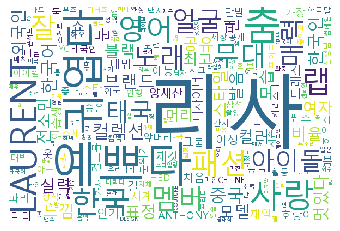

In [96]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('wc_S6L.png')

In [97]:
S6L.to_csv('./magazine/final/S6L_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)